In [1]:
import torch
import torchvision.datasets
import torchvision.models
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
import torch.nn as nn
from tqdm import tqdm
from train_utils import get_data_loaders, train, test
from PIL import Image
import pandas as pd
from convnet import ConvNet

In [ ]:
root = './CIFAR100_DM'
ipc = 50

### CIFAR100 Coreset

In [ ]:
class CIFAR100_Coreset(Dataset):
    def __init__(self, idx_df, transform):
        self.idx_df = idx_df
        self.transform = transform
    
    def __len__(self):
        return len(self.idx_df)

    def __getitem__(self, index):
        entry = self.idx_df.iloc[index]
        image = self.transform(Image.open(entry.image_path))
        label = entry.label
        return image, label

In [ ]:
index_file = pd.read_csv(f'./coreset_index_cifar100/ipc{ipc}_idx.csv')
index_file

,image_path,label
0,./CIFAR10_Syn_Coreset/ipc10/airplane/12a9e4fe-...,0
1,./CIFAR10_Syn_Coreset/ipc10/airplane/145dd04f-...,0
2,./CIFAR10_Syn_Coreset/ipc10/airplane/1bfa1e3c-...,0
3,./CIFAR10_Syn_Coreset/ipc10/airplane/4485d86d-...,0
4,./CIFAR10_Syn_Coreset/ipc10/airplane/6c641b93-...,0
...,...,...
95,./CIFAR10_Syn_Coreset/ipc10/truck/bcb1a952-11b...,9
96,./CIFAR10_Syn_Coreset/ipc10/truck/d2cbc043-f73...,9
97,./CIFAR10_Syn_Coreset/ipc10/truck/f3ec18c5-73c...,9
98,./CIFAR10_Syn_Coreset/ipc10/truck/f6c00e48-489...,9


In [ ]:
image_normalize= transforms.Lambda(lambda img: 2 * img / 255. - 1) # normalize to [-1, 1]
# https://github.com/Lornatang/pytorch-alexnet-cifar100/blob/master/utils/datasets.py
transform = transforms.Compose([
                                # transforms.Resize(128),
                                transforms.RandomHorizontalFlip(),
                                transforms.ToTensor(),
                                # image_normalize,
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                              ])
cifar100_coreset_train = CIFAR100_Coreset(index_file, transform)

cifar100_root = '../cifar100'
cifar100_test = torchvision.datasets.CIFAR100(cifar100_root,
                                            train=False,
                                            transform=transforms.Compose([
                                                # transforms.Resize(128),
                                                transforms.ToTensor(),
                                                # image_normalize,
                                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
                                              ]))

In [ ]:
batch_size = 16
train_data_loader, test_data_loader = get_data_loaders(cifar100_coreset_train, cifar100_test, batch_size=batch_size)

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"[INFO]: Computation device: {device}")

[INFO]: Computation device: cuda


In [ ]:
import os

model_name = 'ConvNetD3'
model_path = f'./model_weight/ipc{ipc}/{model_name}/'
if not os.path.exists(model_path):
    os.makedirs(model_path)
# Following ConvNetD3's definition from the DATM paper, but first one changed to 32 from 128
net_width, net_depth, net_act, net_norm, net_pooling = 32, 3, 'relu', 'instancenorm', 'avgpooling'
model = ConvNet(channel=3, num_classes=100, net_width=net_width, net_depth=3, net_act=net_act, net_norm=net_norm, net_pooling=net_pooling)

In [ ]:
train_record, test_record  = train(model, model_path, train_data_loader, test_data_loader, num_epochs=100)

Epoch 1: 100%|██████████| 25/25 [00:00<00:00, 59.08it/s, loss=2.62]


epoch: 1 done, loss: 0.5277915000915527
Acc: 0.2168
[0.001]


Epoch 2: 100%|██████████| 25/25 [00:00<00:00, 144.09it/s, loss=0.963]


epoch: 2 done, loss: 0.32527437806129456
Acc: 0.2568
[0.001]


Epoch 3: 100%|██████████| 25/25 [00:00<00:00, 158.00it/s, loss=1]    

epoch: 3 done, loss: 0.22140878438949585


Acc: 0.2573
[0.001]


Epoch 4: 100%|██████████| 25/25 [00:00<00:00, 159.64it/s, loss=0.443]

epoch: 4 done, loss: 0.1609148234128952


Acc: 0.2711
[0.001]


Epoch 5: 100%|██████████| 25/25 [00:00<00:00, 136.91it/s, loss=0.74] 


epoch: 5 done, loss: 0.120399110019207
Acc: 0.2854
[0.001]


Epoch 6: 100%|██████████| 25/25 [00:00<00:00, 124.53it/s, loss=0.779]


epoch: 6 done, loss: 0.09302562475204468
Acc: 0.2686
[0.0001]


Epoch 7: 100%|██████████| 25/25 [00:00<00:00, 103.63it/s, loss=0.177]


epoch: 7 done, loss: 0.07794991135597229
Acc: 0.2801
[0.0001]


Epoch 8: 100%|██████████| 25/25 [00:00<00:00, 107.93it/s, loss=0.146] 


epoch: 8 done, loss: 0.06629122793674469
Acc: 0.2884
[0.0001]


Epoch 9: 100%|██████████| 25/25 [00:00<00:00, 109.11it/s, loss=0.547] 


epoch: 9 done, loss: 0.06437454372644424
Acc: 0.2882
[0.0001]


Epoch 10: 100%|██████████| 25/25 [00:00<00:00, 114.81it/s, loss=0.203] 


epoch: 10 done, loss: 0.05797168239951134
Acc: 0.2902
[1e-05]


Epoch 11: 100%|██████████| 25/25 [00:00<00:00, 111.62it/s, loss=0.11]  


epoch: 11 done, loss: 0.05781221389770508
Acc: 0.2904
[1e-05]


Epoch 12: 100%|██████████| 25/25 [00:00<00:00, 108.55it/s, loss=0.12]  


epoch: 12 done, loss: 0.054353754967451096
Acc: 0.2904
[1e-05]


Epoch 13: 100%|██████████| 25/25 [00:00<00:00, 103.22it/s, loss=0.21]  


epoch: 13 done, loss: 0.054769888520240784
Acc: 0.2903
[1e-05]


Epoch 14: 100%|██████████| 25/25 [00:00<00:00, 98.96it/s, loss=0.139]


epoch: 14 done, loss: 0.05673599615693092
Acc: 0.2909
[1.0000000000000002e-06]


Epoch 15: 100%|██████████| 25/25 [00:00<00:00, 108.72it/s, loss=0.239] 


epoch: 15 done, loss: 0.05681641027331352
Acc: 0.2911
[1.0000000000000002e-06]


Epoch 16: 100%|██████████| 25/25 [00:00<00:00, 103.12it/s, loss=0.28] 


epoch: 16 done, loss: 0.054271768778562546
Acc: 0.291
[1.0000000000000002e-06]


Epoch 17: 100%|██████████| 25/25 [00:00<00:00, 103.70it/s, loss=0.124]


epoch: 17 done, loss: 0.052656881511211395
Acc: 0.2911
[1.0000000000000002e-06]


Epoch 18: 100%|██████████| 25/25 [00:00<00:00, 114.70it/s, loss=0.221] 


epoch: 18 done, loss: 0.052354034036397934
Acc: 0.2911
[1.0000000000000002e-06]


Epoch 19: 100%|██████████| 25/25 [00:00<00:00, 106.34it/s, loss=0.273]


epoch: 19 done, loss: 0.054121021181344986
Acc: 0.2912
[1.0000000000000002e-06]


Epoch 20: 100%|██████████| 25/25 [00:00<00:00, 108.25it/s, loss=0.165] 


epoch: 20 done, loss: 0.05120328441262245
Acc: 0.2912
[1.0000000000000002e-06]


Epoch 21: 100%|██████████| 25/25 [00:00<00:00, 108.30it/s, loss=0.193] 


epoch: 21 done, loss: 0.050878580659627914
Acc: 0.2912
[1.0000000000000002e-06]


Epoch 22: 100%|██████████| 25/25 [00:00<00:00, 100.47it/s, loss=0.0679]


epoch: 22 done, loss: 0.05499797686934471
Acc: 0.2912
[1.0000000000000002e-06]


Epoch 23: 100%|██████████| 25/25 [00:00<00:00, 103.36it/s, loss=0.161] 


epoch: 23 done, loss: 0.05169455334544182
Acc: 0.2914
[1.0000000000000002e-06]


Epoch 24: 100%|██████████| 25/25 [00:00<00:00, 98.28it/s, loss=0.527]  


epoch: 24 done, loss: 0.051029022783041
Acc: 0.2916
[1.0000000000000002e-06]


Epoch 25: 100%|██████████| 25/25 [00:00<00:00, 104.76it/s, loss=0.156]


epoch: 25 done, loss: 0.04922650381922722
Acc: 0.2918
[1.0000000000000002e-06]


Epoch 26: 100%|██████████| 25/25 [00:00<00:00, 112.44it/s, loss=0.114]


epoch: 26 done, loss: 0.052965760231018066
Acc: 0.2917
[1.0000000000000002e-06]


Epoch 27: 100%|██████████| 25/25 [00:00<00:00, 105.74it/s, loss=0.0902]


epoch: 27 done, loss: 0.0562141090631485
Acc: 0.2913
[1.0000000000000002e-06]


Epoch 28: 100%|██████████| 25/25 [00:00<00:00, 102.30it/s, loss=0.166]


epoch: 28 done, loss: 0.05068403482437134
Acc: 0.2914
[1.0000000000000002e-06]


Epoch 29: 100%|██████████| 25/25 [00:00<00:00, 108.13it/s, loss=0.365] 


epoch: 29 done, loss: 0.05270688235759735
Acc: 0.2917
[1.0000000000000002e-06]


Epoch 30: 100%|██████████| 25/25 [00:00<00:00, 105.36it/s, loss=0.169] 


epoch: 30 done, loss: 0.0531032420694828
Acc: 0.292
[1.0000000000000002e-06]


Epoch 31: 100%|██████████| 25/25 [00:00<00:00, 106.22it/s, loss=0.0944]


epoch: 31 done, loss: 0.04949195310473442
Acc: 0.2918
[1.0000000000000002e-06]


Epoch 32: 100%|██████████| 25/25 [00:00<00:00, 98.39it/s, loss=0.235] 


epoch: 32 done, loss: 0.054216668009757996
Acc: 0.292
[1.0000000000000002e-06]


Epoch 33: 100%|██████████| 25/25 [00:00<00:00, 101.57it/s, loss=0.157]


epoch: 33 done, loss: 0.05464660003781319
Acc: 0.292
[1.0000000000000002e-06]


Epoch 34: 100%|██████████| 25/25 [00:00<00:00, 105.75it/s, loss=0.104]


epoch: 34 done, loss: 0.0510193295776844
Acc: 0.292
[1.0000000000000002e-06]


Epoch 35: 100%|██████████| 25/25 [00:00<00:00, 111.81it/s, loss=0.21] 


epoch: 35 done, loss: 0.05391850695014
Acc: 0.292
[1.0000000000000002e-06]


Epoch 36: 100%|██████████| 25/25 [00:00<00:00, 114.76it/s, loss=0.129] 


epoch: 36 done, loss: 0.05276960879564285
Acc: 0.2921
[1.0000000000000002e-06]


Epoch 37: 100%|██████████| 25/25 [00:00<00:00, 112.11it/s, loss=0.11]  


epoch: 37 done, loss: 0.051495738327503204
Acc: 0.2921
[1.0000000000000002e-06]


Epoch 38: 100%|██████████| 25/25 [00:00<00:00, 118.20it/s, loss=0.15]  


epoch: 38 done, loss: 0.04718110337853432
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 39: 100%|██████████| 25/25 [00:00<00:00, 115.47it/s, loss=0.148]


epoch: 39 done, loss: 0.05238455533981323
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 40: 100%|██████████| 25/25 [00:00<00:00, 104.11it/s, loss=0.129]


epoch: 40 done, loss: 0.052655067294836044
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 41: 100%|██████████| 25/25 [00:00<00:00, 101.59it/s, loss=0.206]


epoch: 41 done, loss: 0.05472341552376747
Acc: 0.2923
[1.0000000000000002e-06]


Epoch 42: 100%|██████████| 25/25 [00:00<00:00, 104.09it/s, loss=0.157] 


epoch: 42 done, loss: 0.05732790380716324
Acc: 0.2923
[1.0000000000000002e-06]


Epoch 43: 100%|██████████| 25/25 [00:00<00:00, 106.35it/s, loss=0.226]


epoch: 43 done, loss: 0.051700323820114136
Acc: 0.2923
[1.0000000000000002e-06]


Epoch 44: 100%|██████████| 25/25 [00:00<00:00, 107.76it/s, loss=0.146] 


epoch: 44 done, loss: 0.04990151897072792
Acc: 0.2924
[1.0000000000000002e-06]


Epoch 45: 100%|██████████| 25/25 [00:00<00:00, 101.81it/s, loss=0.179] 


epoch: 45 done, loss: 0.051348865032196045
Acc: 0.2925
[1.0000000000000002e-06]


Epoch 46: 100%|██████████| 25/25 [00:00<00:00, 109.90it/s, loss=0.287]


epoch: 46 done, loss: 0.053632523864507675
Acc: 0.2925
[1.0000000000000002e-06]


Epoch 47: 100%|██████████| 25/25 [00:00<00:00, 110.06it/s, loss=0.146] 


epoch: 47 done, loss: 0.05174749717116356
Acc: 0.2925
[1.0000000000000002e-06]


Epoch 48: 100%|██████████| 25/25 [00:00<00:00, 104.88it/s, loss=0.192] 


epoch: 48 done, loss: 0.05413245037198067
Acc: 0.2924
[1.0000000000000002e-06]


Epoch 49: 100%|██████████| 25/25 [00:00<00:00, 106.74it/s, loss=0.444] 


epoch: 49 done, loss: 0.05126414820551872
Acc: 0.2926
[1.0000000000000002e-06]


Epoch 50: 100%|██████████| 25/25 [00:00<00:00, 107.34it/s, loss=0.532] 


epoch: 50 done, loss: 0.05145387351512909
Acc: 0.2924
[1.0000000000000002e-06]


Epoch 51: 100%|██████████| 25/25 [00:00<00:00, 105.28it/s, loss=0.266] 


epoch: 51 done, loss: 0.04926310479640961
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 52: 100%|██████████| 25/25 [00:00<00:00, 100.59it/s, loss=0.0678]


epoch: 52 done, loss: 0.049037396907806396
Acc: 0.2923
[1.0000000000000002e-06]


Epoch 53: 100%|██████████| 25/25 [00:00<00:00, 117.19it/s, loss=0.114] 


epoch: 53 done, loss: 0.04851192981004715
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 54: 100%|██████████| 25/25 [00:00<00:00, 105.03it/s, loss=0.153] 


epoch: 54 done, loss: 0.050977665930986404
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 55: 100%|██████████| 25/25 [00:00<00:00, 118.48it/s, loss=0.0912]


epoch: 55 done, loss: 0.05121385306119919
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 56: 100%|██████████| 25/25 [00:00<00:00, 112.33it/s, loss=0.12]  


epoch: 56 done, loss: 0.05441361293196678
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 57: 100%|██████████| 25/25 [00:00<00:00, 121.57it/s, loss=0.234] 


epoch: 57 done, loss: 0.05090495944023132
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 58: 100%|██████████| 25/25 [00:00<00:00, 118.64it/s, loss=0.38]  


epoch: 58 done, loss: 0.05204884707927704
Acc: 0.2923
[1.0000000000000002e-06]


Epoch 59: 100%|██████████| 25/25 [00:00<00:00, 117.72it/s, loss=0.124]


epoch: 59 done, loss: 0.05354449525475502
Acc: 0.2924
[1.0000000000000002e-06]


Epoch 60: 100%|██████████| 25/25 [00:00<00:00, 127.81it/s, loss=0.229] 


epoch: 60 done, loss: 0.052590154111385345
Acc: 0.2926
[1.0000000000000002e-06]


Epoch 61: 100%|██████████| 25/25 [00:00<00:00, 121.21it/s, loss=0.497] 


epoch: 61 done, loss: 0.05579454451799393
Acc: 0.2925
[1.0000000000000002e-06]


Epoch 62: 100%|██████████| 25/25 [00:00<00:00, 115.52it/s, loss=0.13]  


epoch: 62 done, loss: 0.054223187267780304
Acc: 0.2926
[1.0000000000000002e-06]


Epoch 63: 100%|██████████| 25/25 [00:00<00:00, 119.48it/s, loss=0.103] 


epoch: 63 done, loss: 0.052170515060424805
Acc: 0.2926
[1.0000000000000002e-06]


Epoch 64: 100%|██████████| 25/25 [00:00<00:00, 128.36it/s, loss=0.0646]


epoch: 64 done, loss: 0.05081769824028015
Acc: 0.2925
[1.0000000000000002e-06]


Epoch 65: 100%|██████████| 25/25 [00:00<00:00, 119.64it/s, loss=0.167]


epoch: 65 done, loss: 0.050258781760931015
Acc: 0.2924
[1.0000000000000002e-06]


Epoch 66: 100%|██████████| 25/25 [00:00<00:00, 130.67it/s, loss=0.139]


epoch: 66 done, loss: 0.04981816187500954
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 67: 100%|██████████| 25/25 [00:00<00:00, 127.47it/s, loss=0.236] 


epoch: 67 done, loss: 0.04974694922566414
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 68: 100%|██████████| 25/25 [00:00<00:00, 122.51it/s, loss=0.244] 


epoch: 68 done, loss: 0.053172070533037186
Acc: 0.2921
[1.0000000000000002e-06]


Epoch 69: 100%|██████████| 25/25 [00:00<00:00, 118.96it/s, loss=0.129] 


epoch: 69 done, loss: 0.05104300379753113
Acc: 0.2922
[1.0000000000000002e-06]


Epoch 70: 100%|██████████| 25/25 [00:00<00:00, 137.20it/s, loss=0.239] 


epoch: 70 done, loss: 0.050695378333330154
Acc: 0.2921
[1.0000000000000002e-06]


Epoch 71: 100%|██████████| 25/25 [00:00<00:00, 121.97it/s, loss=0.21] 


epoch: 71 done, loss: 0.049417272210121155
Acc: 0.292
[1.0000000000000002e-06]


Epoch 72: 100%|██████████| 25/25 [00:00<00:00, 100.92it/s, loss=0.0949]


epoch: 72 done, loss: 0.05284791812300682
Acc: 0.292
[1.0000000000000002e-06]


Epoch 73: 100%|██████████| 25/25 [00:00<00:00, 114.47it/s, loss=0.103] 


epoch: 73 done, loss: 0.049169402569532394
Acc: 0.292
[1.0000000000000002e-06]


Epoch 74: 100%|██████████| 25/25 [00:00<00:00, 128.77it/s, loss=0.391] 


epoch: 74 done, loss: 0.05267566069960594
Acc: 0.2921
[1.0000000000000002e-06]


Epoch 75: 100%|██████████| 25/25 [00:00<00:00, 122.97it/s, loss=0.369] 


epoch: 75 done, loss: 0.05268889665603638
Acc: 0.2921
[1.0000000000000002e-06]


Epoch 76: 100%|██████████| 25/25 [00:00<00:00, 100.69it/s, loss=0.116]


epoch: 76 done, loss: 0.05164913460612297
Acc: 0.2925
[1.0000000000000002e-06]


Epoch 77: 100%|██████████| 25/25 [00:00<00:00, 126.47it/s, loss=0.417] 


epoch: 77 done, loss: 0.05149517580866814
Acc: 0.2925
[1.0000000000000002e-06]


Epoch 78: 100%|██████████| 25/25 [00:00<00:00, 124.43it/s, loss=0.0927]


epoch: 78 done, loss: 0.05065121129155159
Acc: 0.2928
[1.0000000000000002e-06]


Epoch 79: 100%|██████████| 25/25 [00:00<00:00, 112.03it/s, loss=0.288] 


epoch: 79 done, loss: 0.05065139755606651
Acc: 0.2927
[1.0000000000000002e-06]


Epoch 80: 100%|██████████| 25/25 [00:00<00:00, 118.26it/s, loss=0.211]


epoch: 80 done, loss: 0.048001889139413834
Acc: 0.2928
[1.0000000000000002e-06]


Epoch 81: 100%|██████████| 25/25 [00:00<00:00, 127.28it/s, loss=0.213] 


epoch: 81 done, loss: 0.05295822396874428
Acc: 0.293
[1.0000000000000002e-06]


Epoch 82: 100%|██████████| 25/25 [00:00<00:00, 107.89it/s, loss=0.0844]


epoch: 82 done, loss: 0.04860522225499153
Acc: 0.2929
[1.0000000000000002e-06]


Epoch 83: 100%|██████████| 25/25 [00:00<00:00, 120.54it/s, loss=0.364] 


epoch: 83 done, loss: 0.05075131729245186
Acc: 0.2931
[1.0000000000000002e-06]


Epoch 84: 100%|██████████| 25/25 [00:00<00:00, 118.62it/s, loss=0.124] 


epoch: 84 done, loss: 0.054354261606931686
Acc: 0.293
[1.0000000000000002e-06]


Epoch 85: 100%|██████████| 25/25 [00:00<00:00, 119.59it/s, loss=0.265] 


epoch: 85 done, loss: 0.05399945005774498
Acc: 0.2931
[1.0000000000000002e-06]


Epoch 86: 100%|██████████| 25/25 [00:00<00:00, 113.88it/s, loss=0.197]


epoch: 86 done, loss: 0.04965785890817642
Acc: 0.2932
[1.0000000000000002e-06]


Epoch 87: 100%|██████████| 25/25 [00:00<00:00, 114.81it/s, loss=0.164] 


epoch: 87 done, loss: 0.05181475356221199
Acc: 0.2928
[1.0000000000000002e-06]


Epoch 88: 100%|██████████| 25/25 [00:00<00:00, 132.52it/s, loss=0.162] 


epoch: 88 done, loss: 0.04953224956989288
Acc: 0.293
[1.0000000000000002e-06]


Epoch 89: 100%|██████████| 25/25 [00:00<00:00, 121.81it/s, loss=0.244] 


epoch: 89 done, loss: 0.04880823194980621
Acc: 0.293
[1.0000000000000002e-06]


Epoch 90: 100%|██████████| 25/25 [00:00<00:00, 126.88it/s, loss=0.257]


epoch: 90 done, loss: 0.05346032604575157
Acc: 0.2931
[1.0000000000000002e-06]


Epoch 91: 100%|██████████| 25/25 [00:00<00:00, 122.08it/s, loss=0.286] 


epoch: 91 done, loss: 0.051436904817819595
Acc: 0.2931
[1.0000000000000002e-06]


Epoch 92: 100%|██████████| 25/25 [00:00<00:00, 124.99it/s, loss=0.139] 


epoch: 92 done, loss: 0.05143686756491661
Acc: 0.2931
[1.0000000000000002e-06]


Epoch 93: 100%|██████████| 25/25 [00:00<00:00, 120.05it/s, loss=0.121] 


epoch: 93 done, loss: 0.05138806626200676
Acc: 0.2935
[1.0000000000000002e-06]


Epoch 94: 100%|██████████| 25/25 [00:00<00:00, 119.51it/s, loss=0.12]  


epoch: 94 done, loss: 0.050862882286310196
Acc: 0.2934
[1.0000000000000002e-06]


Epoch 95: 100%|██████████| 25/25 [00:00<00:00, 123.61it/s, loss=0.207] 


epoch: 95 done, loss: 0.05353425815701485
Acc: 0.2935
[1.0000000000000002e-06]


Epoch 96: 100%|██████████| 25/25 [00:00<00:00, 124.89it/s, loss=0.128] 


epoch: 96 done, loss: 0.053388528525829315
Acc: 0.2936
[1.0000000000000002e-06]


Epoch 97: 100%|██████████| 25/25 [00:00<00:00, 126.48it/s, loss=0.526]


epoch: 97 done, loss: 0.05020292475819588
Acc: 0.2937
[1.0000000000000002e-06]


Epoch 98: 100%|██████████| 25/25 [00:00<00:00, 115.85it/s, loss=0.146]


epoch: 98 done, loss: 0.051985252648591995
Acc: 0.2938
[1.0000000000000002e-06]


Epoch 99: 100%|██████████| 25/25 [00:00<00:00, 118.22it/s, loss=0.319] 


epoch: 99 done, loss: 0.05042991042137146
Acc: 0.2938
[1.0000000000000002e-06]


Epoch 100: 100%|██████████| 25/25 [00:00<00:00, 120.86it/s, loss=0.279] 


epoch: 100 done, loss: 0.05140232294797897
Acc: 0.2939
[1.0000000000000002e-06]
Time taken: 600.124483 seconds


In [ ]:
test(model, f'{model_path}/model.bin', test_data_loader, criterion=nn.CrossEntropyLoss()) #best_acc, test_loss

(0.2939, tensor(0.5863, device='cuda:0'))

<AxesSubplot: >

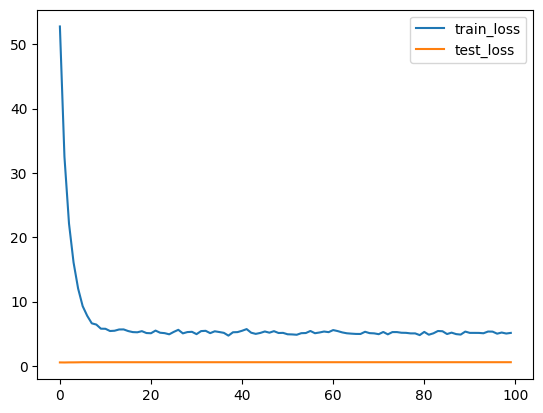

In [ ]:

results = pd.DataFrame([])
results['train_loss']  = train_record
results['test_loss']  = test_record
results.plot.line(y=['train_loss', 'test_loss'])